In [15]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic') 
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.info() # information dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
titanic.describe() 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.isnull().sum() # show the null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.drop(['age','alive'], axis=1, inplace=True)


In [6]:
titanic

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,True


In [7]:
l=['sex','embarked','class','who','adult_male','deck','embark_town','alone'] # transform data set
for i in l:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    le.fit(titanic[i])
    titanic[i]=le.transform(titanic[i])

In [8]:
X = titanic.iloc[:,1:]
y = titanic.iloc[:,0]

In [9]:
X


,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,3,1,1,0,7.2500,2,2,1,1,7,2,0
1,1,0,1,0,71.2833,0,0,2,0,2,0,0
2,3,0,0,0,7.9250,2,2,2,0,7,2,1
3,1,0,1,0,53.1000,2,0,2,0,2,2,0
4,3,1,0,0,8.0500,2,2,1,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,2,1,1,1,7,2,1
887,1,0,0,0,30.0000,2,0,2,0,1,2,1
888,3,0,1,2,23.4500,2,2,2,0,7,2,0
889,1,1,0,0,30.0000,0,0,1,1,2,0,1


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=11)
X_train

,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
333,3,1,2,0,18.0000,2,2,1,1,7,2,0
662,1,1,0,0,25.5875,2,0,1,1,4,2,1
382,3,1,0,0,7.9250,2,2,1,1,7,2,1
331,1,1,0,0,28.5000,2,0,1,1,2,2,1
149,2,1,0,0,13.0000,2,1,1,1,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0,0,0,135.6333,2,0,2,0,2,2,1
337,1,0,0,0,134.5000,0,0,2,0,4,0,1
91,3,1,0,0,7.8542,2,2,1,1,7,2,1
80,3,1,0,0,9.0000,2,2,1,1,7,2,1


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [14]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='survived'>

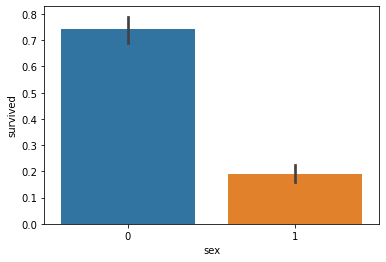

In [15]:
import matplotlib.pyplot as plt
sns.barplot(data=titanic,x='sex',y='survived')

In [16]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8212290502793296

In [18]:
from sklearn.metrics import accuracy_score
import numpy as np

for i in range (1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( X_train , y_train )
    y_pred = knn.predict(X_test)
    Accuracy_score = accuracy_score(y_test, y_pred)

    print("Accuracy when k is "+str(i)+" = ",Accuracy_score)

Accuracy when k is 1 =  0.7374301675977654
Accuracy when k is 3 =  0.8212290502793296
Accuracy when k is 5 =  0.7653631284916201
Accuracy when k is 7 =  0.7988826815642458
Accuracy when k is 9 =  0.7821229050279329
Accuracy when k is 11 =  0.776536312849162
Accuracy when k is 13 =  0.7653631284916201
Accuracy when k is 15 =  0.7541899441340782


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[99, 19],
       [25, 36]], dtype=int64)

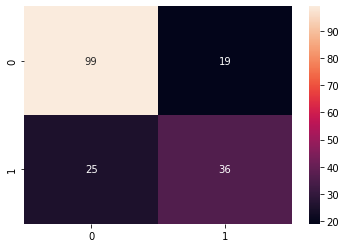

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [21]:
from sklearn.metrics import classification_report   
y_pred = knn.predict(X_test) 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       118
           1       0.65      0.59      0.62        61

    accuracy                           0.75       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.75      0.75      0.75       179



In [22]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()  # GridSearchCV
param_grid = {'n_neighbors': [1, 10]}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 10]})